# 뉴럴네트워크 다중분류 (아이리스 데이터셋)

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [57]:
#!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv

In [58]:
df = pd.read_csv('iris.csv')
df.shape

(150, 5)

In [59]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df.isna().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,0


## 2.데이터 분리

In [62]:
X = df.drop('Species', axis=1)
y = df['Species']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 스케일링

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss = StandardScaler()

# 학습
ss.fit(X_train)

# 데이터 변경
X_train_s = ss.transform(X_train)

### 레이블 인코딩

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
le.fit(y_train)

y_train_e = le.transform(y_train)
y_train_e

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [70]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 원핫인코딩

In [71]:
from keras.utils import to_categorical

In [72]:
y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [73]:
type(X_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

## 3.모델 만들기

In [74]:
from keras import layers

In [75]:
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [77]:
EPOCHS = 300
BATCHSIZE = 32

history = model.fit(
    X_train_s,
    y_train_o,
    epochs=EPOCHS,
    batch_size=BATCHSIZE,
    validation_split=0.2,
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - acc: 0.1458 - loss: 1.1935 - val_acc: 0.1667 - val_loss: 1.2268
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.2422 - loss: 1.1694 - val_acc: 0.2083 - val_loss: 1.2003
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3724 - loss: 1.1381 - val_acc: 0.2083 - val_loss: 1.1759
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.3503 - loss: 1.1249 - val_acc: 0.2083 - val_loss: 1.1535
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.3776 - loss: 1.0836 - val_acc: 0.2083 - val_loss: 1.1346
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.3659 - loss: 1.0770 - val_acc: 0.2083 - val_loss: 1.1170
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3464 - loss: 1.0595 - val_acc: 0.2083 - val_loss: 1.1015
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3581 - loss: 1.0392 - val_acc: 0.2083 - val_loss: 1.0888
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3464 - loss:

In [78]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

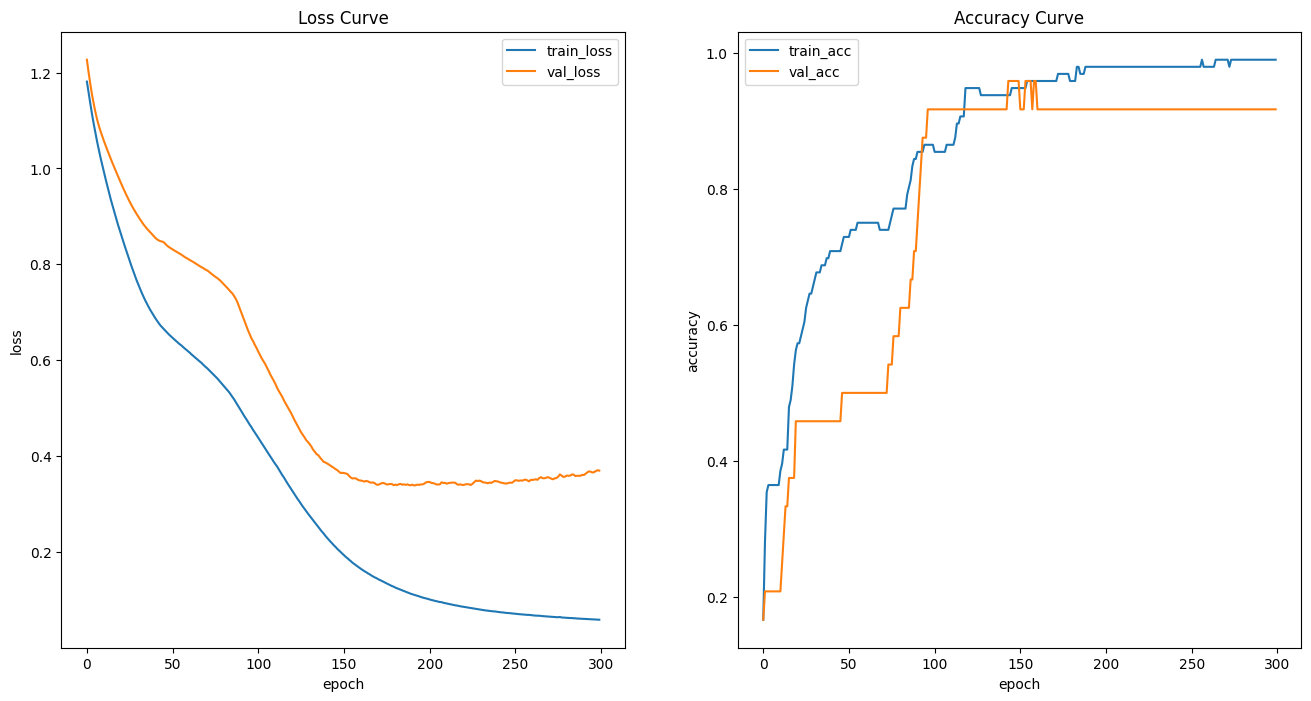

In [79]:
plot_history(history)

## 4.테스트

In [80]:
# 1. X_test 스케일링
# 2. y_test 레이블인코딩
# 3. y_test 원핫인코딩

In [81]:
X_test_s = ss.transform(X_test)

In [82]:
y_test_e = le.transform(y_test)

In [83]:
y_test_o = to_categorical(y_test_e)
y_test_o[:10]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [84]:
y_pred = model.predict(X_test_s)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[8.5906824e-03, 9.8834413e-01, 3.0652033e-03],
       [9.9893743e-01, 1.0623247e-03, 2.8854626e-07],
       [6.6559907e-05, 2.4253710e-05, 9.9990910e-01],
       [2.9355800e-02, 9.2873186e-01, 4.1912366e-02],
       [7.9033840e-03, 9.8600334e-01, 6.0931798e-03],
       [9.9813557e-01, 1.8629158e-03, 1.5224218e-06],
       [1.5233610e-02, 9.8415112e-01, 6.1522616e-04],
       [4.1803410e-03, 6.7344406e-03, 9.8908526e-01],
       [5.4803565e-02, 6.8405133e-01, 2.6114509e-01],
       [4.5219488e-03, 9.9518228e-01, 2.9574815e-04],
       [1.1332721e-02, 2.9286072e-02, 9.5938128e-01],
       [9.9822295e-01, 1.7767521e-03, 3.6159889e-07],
       [9.9931055e-01, 6.8908109e-04, 2.9991952e-07],
       [9.9822176e-01, 1.7779662e-03, 3.3074281e-07],
       [9.9987894e-01, 1.2084028e-04, 1.7283105e-07],
       [2.0502182e-02, 9.4638717e-01, 3.3110537e-02],
       [1.1506488e-03, 7.9757825e-04, 9.9805170e-01],
       [2.9592679e-03, 9.9684888e-01, 1.9180929e-04],
       [7.7396492e-03, 9.905

In [85]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [91]:
y_test_e

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 5.평가지표

In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [88]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  1.0
recall:  1.0
precision:  1.0
f1:  1.0


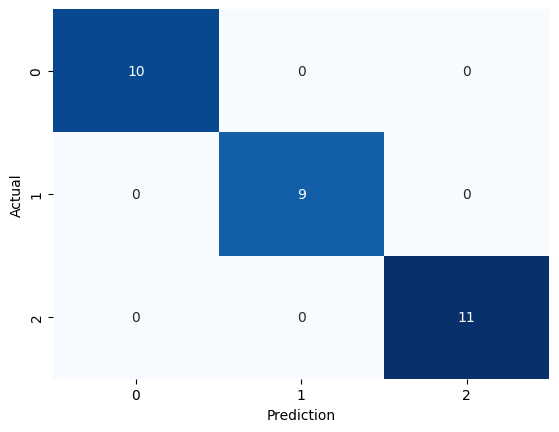

In [93]:
print_metrics(y_test_e, y_pred)